In [144]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
sns.set_style('darkgrid')

In [145]:
data = pd.read_csv('hcvdat0.csv')
data.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
Category,0=Blood Donor,0=Blood Donor,0=Blood Donor,0=Blood Donor,0=Blood Donor
Age,32,32,32,32,32
Sex,m,m,m,m,m
ALB,38.5,38.5,46.9,43.2,39.2
ALP,52.5,70.3,74.7,52,74.1
ALT,7.7,18,36.2,30.6,32.6
AST,22.1,24.7,52.6,22.6,24.8
BIL,7.5,3.9,6.1,18.9,9.6
CHE,6.93,11.17,8.84,7.33,9.15


In [146]:
features = [p for p in data]
features

['Unnamed: 0',
 'Category',
 'Age',
 'Sex',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [147]:
data.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [148]:
data.shape

(615, 14)

<AxesSubplot:>

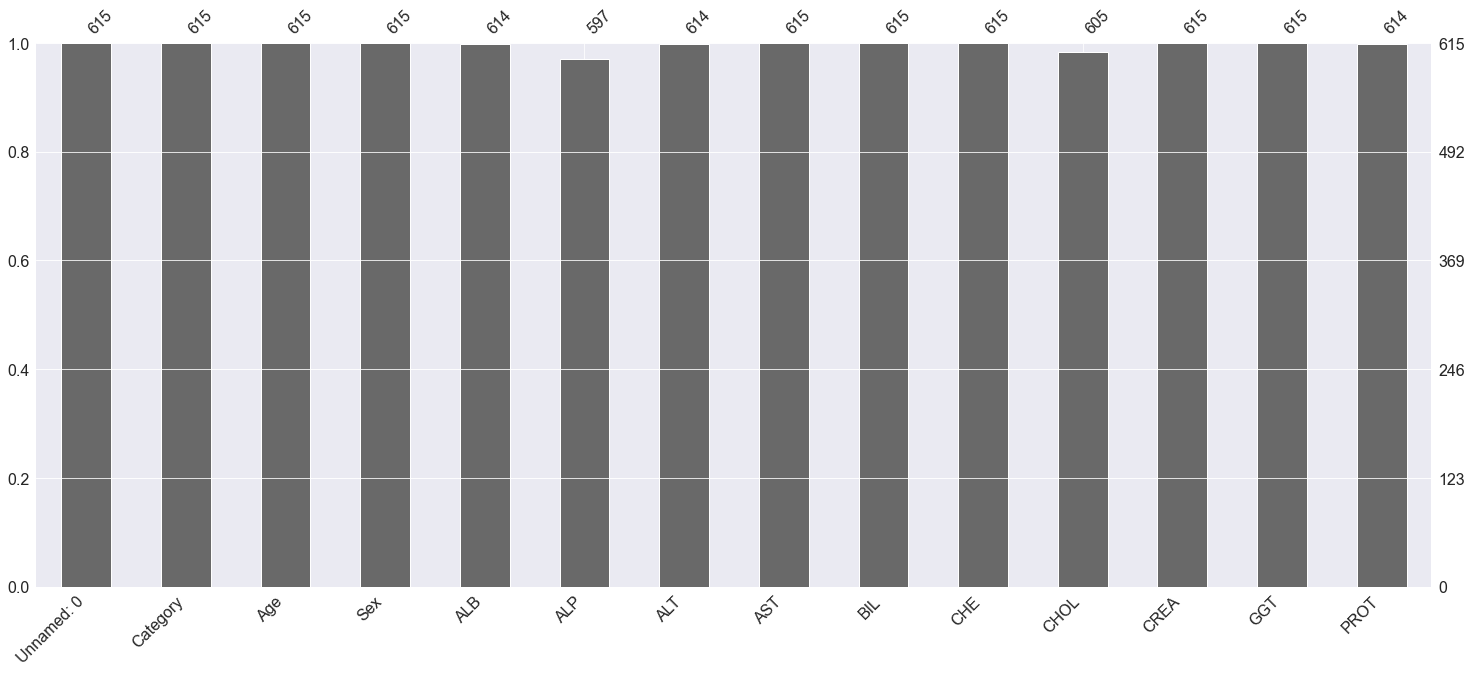

In [149]:
msno.bar(data)

In [150]:
data.dropna(inplace=True)

In [151]:
data.isna().any()

Unnamed: 0    False
Category      False
Age           False
Sex           False
ALB           False
ALP           False
ALT           False
AST           False
BIL           False
CHE           False
CHOL          False
CREA          False
GGT           False
PROT          False
dtype: bool

In [152]:
data.Category.value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [153]:
data.Sex.value_counts().sort_index()

f    226
m    363
Name: Sex, dtype: int64

In [154]:
num_columns = [x for x in data.columns if x not in ['Category', 'Sex']]

# The correlation matrix
corr_mat = data[num_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(num_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Unnamed: 0,0.000000,0.443058,-0.315205,0.017944,-0.200233,0.303603,0.176511,-0.278535,-0.057947,-0.020163,0.221463,-0.166482
Age,0.443058,0.000000,-0.191094,0.177720,-0.040576,0.072739,0.039655,-0.075863,0.124742,-0.025142,0.143379,-0.159760
ALB,-0.315205,-0.191094,0.000000,-0.146120,0.039497,-0.177609,-0.169597,0.360919,0.210420,0.001433,-0.147598,0.570726
ALP,0.017944,0.177720,-0.146120,0.000000,0.221603,0.067024,0.058372,0.029482,0.125900,0.153909,0.461300,-0.063085
ALT,-0.200233,-0.040576,0.039497,0.221603,0.000000,0.198658,-0.106797,0.224344,0.149997,-0.036106,0.219707,0.016786
AST,0.303603,0.072739,-0.177609,0.067024,0.198658,0.000000,0.309580,-0.197270,-0.201213,-0.017948,0.477774,0.017404
BIL,0.176511,0.039655,-0.169597,0.058372,-0.106797,0.309580,0.000000,-0.320713,-0.181570,0.019910,0.210567,-0.052575
CHE,-0.278535,-0.075863,0.360919,0.029482,0.224344,-0.197270,-0.320713,0.000000,0.428018,-0.012120,-0.095716,0.306288
CHOL,-0.057947,0.124742,0.210420,0.125900,0.149997,-0.201213,-0.181570,0.428018,0.000000,-0.051464,0.008823,0.245050
CREA,-0.020163,-0.025142,0.001433,0.153909,-0.036106,-0.017948,0.019910,-0.012120,-0.051464,0.000000,0.125353,-0.030111


In [155]:
corr_mat.abs().idxmax()

Unnamed: 0           Age
Age           Unnamed: 0
ALB                 PROT
ALP                  GGT
ALT                  CHE
AST                  GGT
BIL                  CHE
CHE                 CHOL
CHOL                 CHE
CREA                 ALP
GGT                  AST
PROT                 ALB
dtype: object

In [156]:
skew_columns = (data[num_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

CREA    14.955189
BIL      8.089304
ALT      6.815926
GGT      5.936910
AST      5.246583
ALP      4.756845
dtype: float64

In [157]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[num_columns] = sc.fit_transform(data[num_columns])

data[num_columns].head(4)

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.710677,-1.553745,-0.542701,-0.603230,-0.905494,-0.355457,-0.202289,-0.581777,-1.916091,0.480336,-0.481022,-0.540788
1,-1.704930,-1.553745,-0.542701,0.084054,-0.411380,-0.276283,-0.409283,1.354993,-0.524241,-0.151402,-0.416513,0.862566
2,-1.699182,-1.553745,0.916417,0.253944,0.461714,0.573318,-0.282787,0.290683,-0.169629,0.085500,-0.092127,1.386485
3,-1.693435,-1.553745,0.273710,-0.622536,0.193070,-0.340231,0.453193,-0.399063,-0.577433,-0.032951,-0.081068,0.712875


In [158]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=42)
km = km.fit(data[num_columns])

data['kmeans_5'] = km.predict(data[num_columns])

In [159]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, random_state=42)
km = km.fit(data[num_columns])

data['kmeans_8'] = km.predict(data[num_columns])

In [160]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[num_columns])
data['agglom_W'] = ag.fit_predict(data[num_columns])

In [161]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=8, linkage='single', compute_full_tree=True)
ag = ag.fit(data[num_columns])
data['agglom_s'] = ag.fit_predict(data[num_columns])

In [162]:
(data[['Category','agglom_W','kmeans_5']]
 .groupby(['Category','agglom_W'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Category               agglom_W        
0=Blood Donor          0              6
                       1            240
                       2            280
0s=suspect Blood Donor 0              4
                       2              1
                       4              2
1=Hepatitis            0              4
                       1             11
                       2              3
                       4              2
2=Fibrosis             0              4
                       1              8
3=Cirrhosis            0             16
                       1              1
                       3              3
                       4              4

In [163]:
(data[['Category','agglom_W','kmeans_8']]
 .groupby(['Category','agglom_W'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Category               agglom_W        
0=Blood Donor          0              6
                       1            240
                       2            280
0s=suspect Blood Donor 0              4
                       2              1
                       4              2
1=Hepatitis            0              4
                       1             11
                       2              3
                       4              2
2=Fibrosis             0              4
                       1              8
3=Cirrhosis            0             16
                       1              1
                       3              3
                       4              4

In [164]:
(data[['Category','agglom_s','kmeans_5']]
 .groupby(['Category','agglom_s'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Category               agglom_s        
0=Blood Donor          0            526
0s=suspect Blood Donor 0              4
                       2              1
                       5              1
                       6              1
1=Hepatitis            0             20
2=Fibrosis             0             12
3=Cirrhosis            0             17
                       1              3
                       3              2
                       4              1
                       7              1

In [165]:
(data[['Category','agglom_s','kmeans_8']]
 .groupby(['Category','agglom_s'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Category               agglom_s        
0=Blood Donor          0            526
0s=suspect Blood Donor 0              4
                       2              1
                       5              1
                       6              1
1=Hepatitis            0             20
2=Fibrosis             0             12
3=Cirrhosis            0             17
                       1              3
                       3              2
                       4              1
                       7              1